## Clustering Using REpresentatives (CURE)

Clustering is useful in data mining and statistical data analysis for grouping similar data points together and identifying patterns in distributions.

The majority of clustering algorithms work well for spherical objects, but break down when there are outliers in the dataset. One way to deal with these outliers is to use CURE clustering, a more robust method for classifying datasets with large differences in size or with outliers. 

In CURE clustering, each cluster is represented by a certain number of representative points. These points are chosen by taking the the most scattered points in each cluster and shrinking them towards the cluster centre by a fixed amount, known as the compression.

Below a kd-tree is used in order to store the representative points of each cluster.

### Requirements

The technical dependencies required to run this notebook are as follows:

    - embedPy
    - Matplotlib 2.1.1
    - PyClustering (data samples used below)

### Loading CURE

The CURE algorithm is contained in `cure.q` and loads in the script `kdtree.q` to create the kd-tree.

In [1]:
\l ml/ml.q
.ml.loadfile`:clust/init.q
plt:.p.import`matplotlib.pyplot
fcps:.p.import[`pyclustering.samples.definitions]`:FCPS_SAMPLES
read:.p.import[`pyclustering.utils]`:read_sample
.p.import[`mpl_toolkits.mplot3d]`:Axes3D;

The below creates an image with 4 different clusters, where `datapts` controls how many data points the shape has. This dataset has been used as most clustering algorithms which do not use representative points and compression would struggle to correctly classify different clusters which share the same centre.

In [2]:
dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
d1 :flip(-5 1)+(1 1.5)*dsc[1000; 0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
d1,:flip(4 -1)+(1 8)*dsc[4000; 0;1.]
d1@:neg[2000&count d1]?count d1

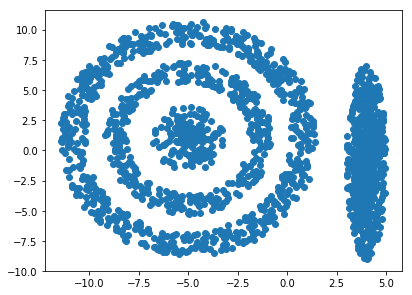

In [3]:
plt[`:scatter][;]. flip d1;
plt[`:show][];

## Inputs

The function `.kd.cure.cure` will run the CURE clustering process on a sample of data. The function takes seven
inputs:
- `d` is data points in matrix form
- `k` is the number of clusters
- `r` is the number of representative points
- `i` is a dictionary of inputs in the form:
    - `df` is the distance function/metric   
    - `c` is the compression
    - `b` is a boolean, `1b` for C, `0b` for q
    - `s` is a boolean, `1b` to return a dictionary, `0b` to return a table of clusters

NB: `(::)` can also be used for `i`. This will use the default dictionary, where: `df = e2dist`, `c = 0`,`b = 0b` and `s = 0b`.

In [4]:
\ts r1:.ml.clust.cure[d1;4;50;(::)]

23048 602016


To check that the data has been clustered correctly, the results can be re-plotted using `matplotlib.pyplot`, with each cluster represented with a different colour. 

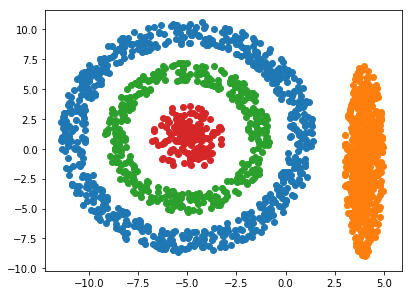

In [5]:
{plt[`:scatter][;]. flip x}each exec pts by clt from r1;
plt[`:show][];

### Adding compression

The following example shows how clustering data can be improved by using compression, when the dataset contains outliers and clusters of various sizes. The dataset below has a number of points spread out from the clusters mutual centre which will cause problems if only a small number of representative points are used.

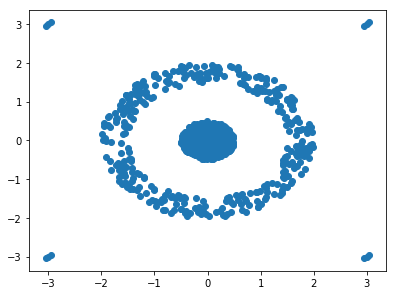

In [6]:
d2:read[fcps`:SAMPLE_TARGET]`
plt[`:scatter][;]. flip d2;
plt[`:show][];

543 279008


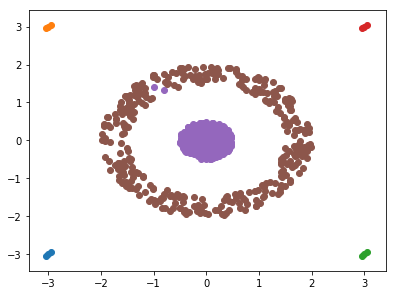

In [7]:
\ts r2:.ml.clust.cure[d2;6;5;(::)]
{plt[`:scatter][;]. flip x}each exec pts by clt from r2;
plt[`:show][];

The results show that the central cluster and the surrounding ring have not been classified correctly. This can be rectified by adding compression, which moves the representative points of each cluster towards its centre to deal with the varying shapes and outliers. Below a small compression of 0.1 is used.

57 280144


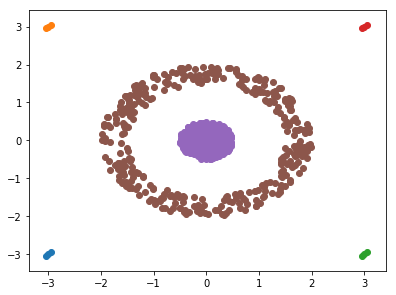

In [8]:
.ml.loadfile`:clust/init.q
\ts r2c:.ml.clust.cure[d2;6;5;`df`c`b`s!(`edist;0.1;1b;0b)]
{plt[`:scatter][;]. flip x}each exec pts by clt from r2c;
plt[`:show][];

In [9]:
cl:.p.import[`pyclustering.cluster.cure][`:cure]

In [10]:
ci:cl[d2;6;`number_represent_points pykw 5;`compression pykw 0.1]
ci[`:process][]

{[f;x]embedPy[f;x]}[foreign]enlist


In [11]:
clusters:ci[`:get_clusters][]`

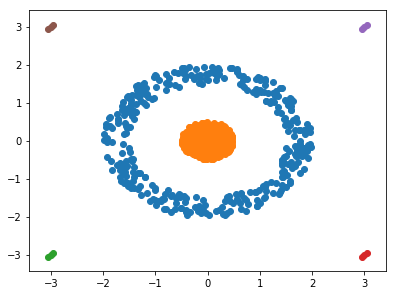

In [12]:
{plt[`:scatter][;]. flip x}each d2 clusters;
plt[`:show][];

## Higher dimenion clustering

CURE clustering also works for datasets of higher dimenions, as shown below. 

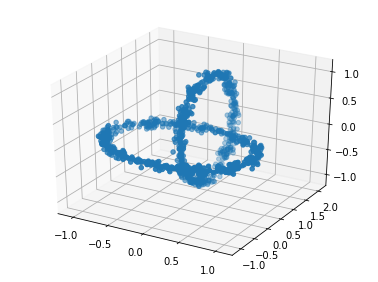

In [13]:
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
ax[`:scatter][;;]. flip d3:read[fcps`:SAMPLE_CHAINLINK]`;
plt[`:show][];

In [14]:
\ts r3:.ml.clust.cure[d3;2;10;(::)]

1318 339584


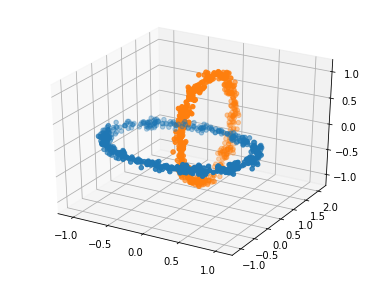

In [15]:
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
{ax[`:scatter][;;]. flip x}each exec pts by clt from r3;
plt[`:show][];

---